First few rows of the dataset:
   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  -0.059357  -0.810759  -1.462912  -0.003486   0.683381   1.065975   
1   1.350408   4.220732   1.564162  -0.047713  -3.378194  -1.173838   
2   1.069958   3.029594  -2.684484   5.316199   0.867742   0.115899   
3  -0.189436   0.240748  -0.685549   0.991412   0.537921  -0.535368   
4  -1.571062  -0.966057  -0.093284  -1.400222  -1.939930   0.698772   

   feature_6  feature_7  feature_8  feature_9  target  
0   0.047220  -0.713335  -0.387791   0.309755       1  
1   1.253721  -1.352617   0.561645   3.055533       1  
2   3.534072   1.674606   1.489776   0.037348       0  
3   0.084447   0.303647  -0.008009  -0.521776       0  
4   0.728243  -1.218458  -1.443351  -0.050100       1  


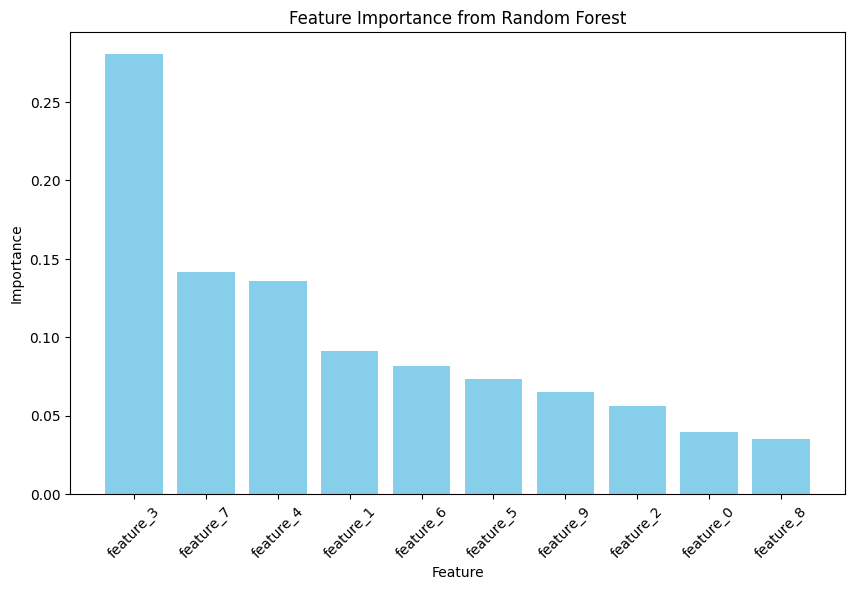

Feature importances:
     Feature  Importance
3  feature_3    0.280739
7  feature_7    0.141629
4  feature_4    0.135706
1  feature_1    0.091246
6  feature_6    0.081806
5  feature_5    0.073177
9  feature_9    0.065098
2  feature_2    0.055906
0  feature_0    0.039412
8  feature_8    0.035281


In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Generate a simple synthetic dataset
np.random.seed(42)
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=42)

# Convert to DataFrame for easier handling
feature_names = [f'feature_{i}' for i in range(10)]
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print("First few rows of the dataset:")
print(df.head())

# Separate features and target
X = df.drop(columns=['target'])
y = df['target']

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

print("Feature importances:")
print(importance_df)